## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
import tensorflow as tf

## Import and Analysis of data

In [2]:
card_data = pd.read_csv('creditcard.csv\creditcard.csv')
print(card_data.shape)
X = card_data.iloc[:, :-1]
Y = card_data.iloc[:, -1]

(284807, 31)


In [3]:
card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# Check if there is null values
card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

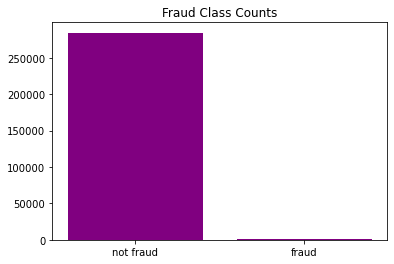

In [5]:
#Plot Fraud vs Not Fraud transaction counts
fraud_count = card_data["Class"].value_counts()
plt.figure()
plt.title("Fraud Class Counts")
plt.bar(fraud_count.index,fraud_count.values,color='purple')
plt.xticks([0,1], labels=["not fraud","fraud"])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

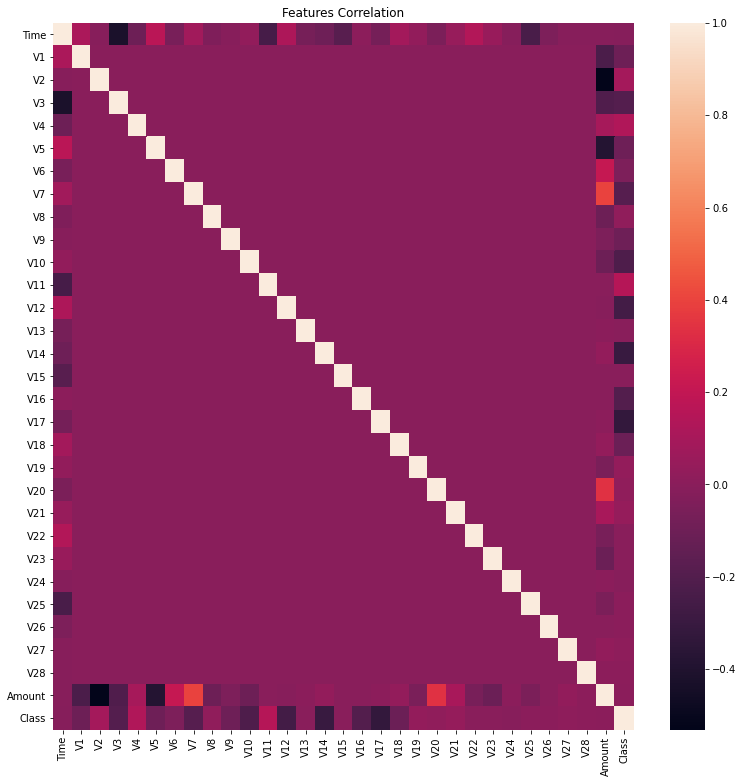

In [6]:
#Plot features correlation
plt.figure(figsize = (13,13))
corr = card_data.corr()
plt.title("Features Correlation")
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show

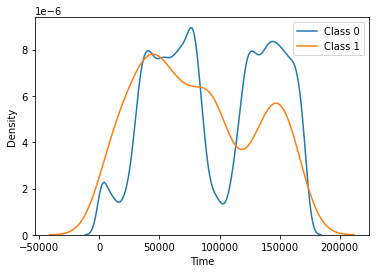

In [7]:
#Transaction Time density plot
notFraud_time = card_data.loc[card_data["Class"]==0]
fraud_time = card_data.loc[card_data["Class"]==1]
plt.figure()
sb.kdeplot(data = notFraud_time["Time"], label = "Class 0")
sb.kdeplot(data = fraud_time["Time"], label = "Class 1")
plt.legend()
plt.show()

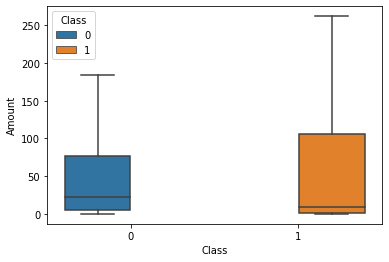

In [8]:
sb.boxplot(x = "Class", y = "Amount", hue = "Class", data = card_data, showfliers = False)
plt.show()

C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Wilson\Anaconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

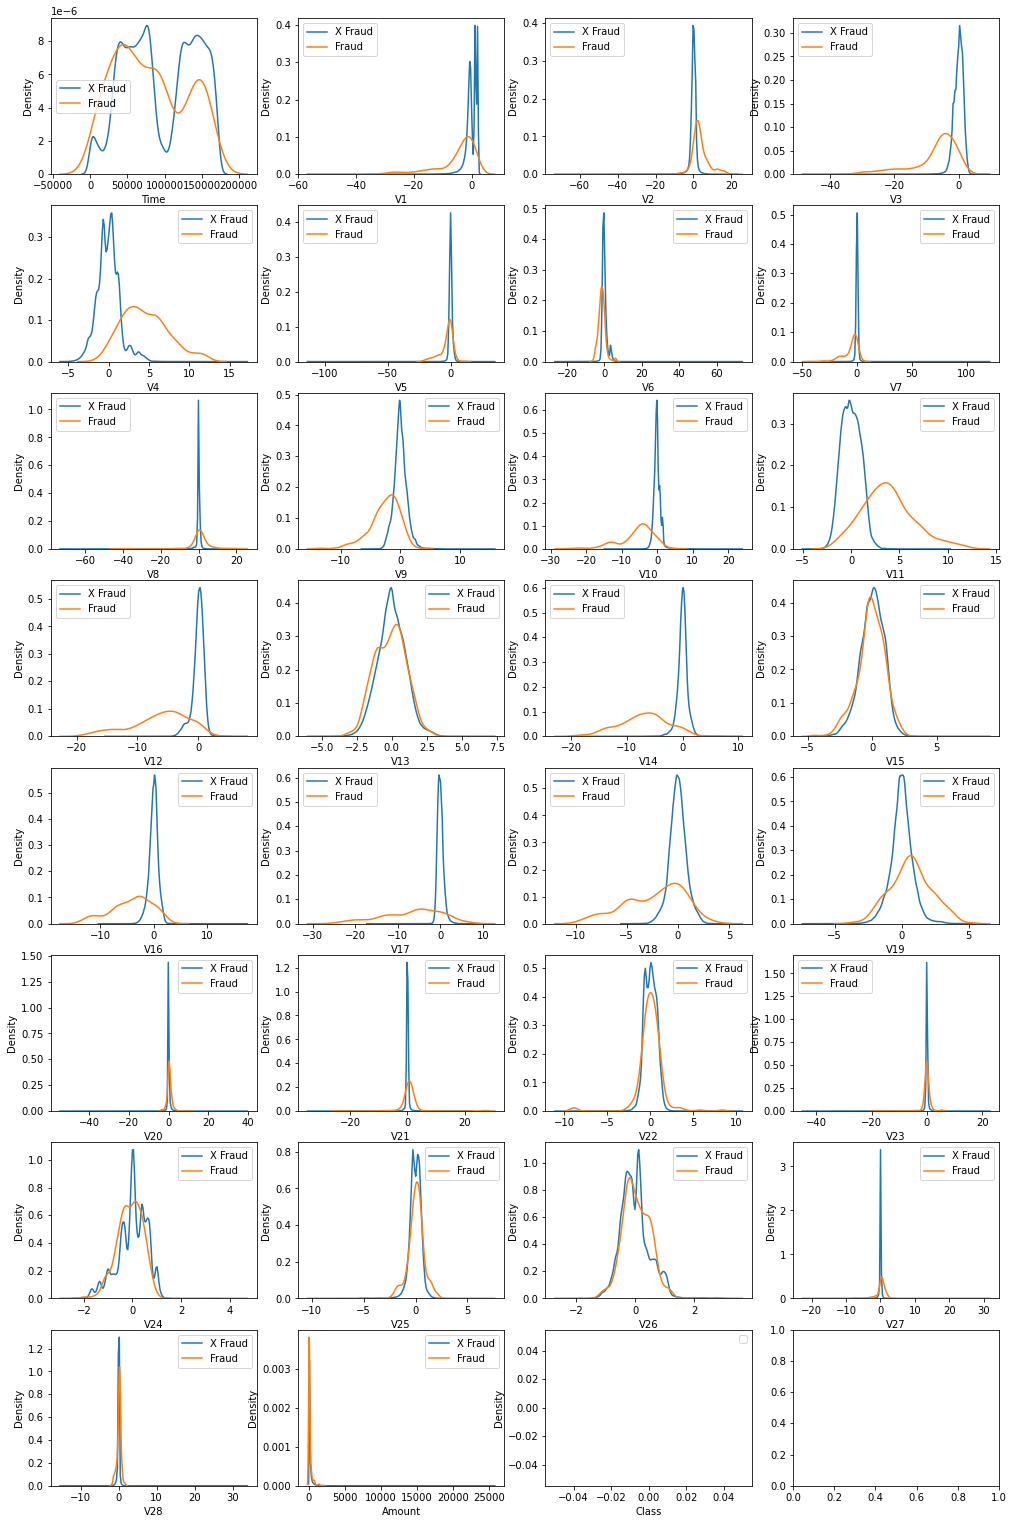

In [9]:
#Features density plot
col = card_data.columns.values
c0 = card_data.loc[card_data["Class"] == 0]
c1 = card_data.loc[card_data["Class"] == 1]
x = 0
plt.figure()
plt.subplots(8,4,figsize=(17,27))

for feature in col:
    x += 1
    plt.subplot(8,4,x)
    sb.kdeplot(data = c0[feature], label = "X Fraud")
    sb.kdeplot(data = c1[feature], label = "Fraud")
    plt.xlabel(feature, fontsize=10)
    plt.legend()
plt.show()

## Data Preprocessing

In [10]:
#Split dataset into test train and valid
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify = Y, test_size = 0.25, random_state = 5)

In [11]:
ct = ColumnTransformer([
        ('std', StandardScaler(), ['Amount', 'Time'])
    ], remainder='passthrough')
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

In [12]:
smote = SMOTE(sampling_strategy='minority')
x_train, y_train = smote.fit_resample(x_train, y_train)

In [13]:
weight_nf = y_train.value_counts()[0] / len(y_train)
weight_f = y_train.value_counts()[1] / len(y_train)
print(f"Non-Fraud weight: {weight_nf}")
print(f"Fraud weight: {weight_f}")

Non-Fraud weight: 0.5
Fraud weight: 0.5


In [14]:
print(f"Train Data shape: {x_train.shape} Train Class Data shape: {y_train.shape}")
print(f"Test Data shape: {x_test.shape} Test Class Data shape: {y_test.shape}")

Train Data shape: (426472, 30) Train Class Data shape: (426472,)
Test Data shape: (71202, 30) Test Class Data shape: (71202,)


## Random Forest Classifier

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score, matthews_corrcoef


def print_classification_result(true, predict):
    print(f"Accuracy Score\n: {accuracy_score(true, predict) * 100:.2f}%")
    print(f"Confusion Matrix: \n {confusion_matrix(true, predict)}\n")
    print(f"MCC_Score\n:{matthews_corrcoef(true, predict)}\n")
    print(f"f1_score: \n {f1_score(true, predict)}\n")
    print(f"recall_score: \n {recall_score(true, predict)}\n")
    print(f"Precision_Score\n:{precision_score(true, predict)}")

In [16]:
from sklearn.ensemble import RandomForestClassifier
randfclassifier = RandomForestClassifier(n_estimators = 100, criterion = "gini")
randfclassifier.fit(x_train, y_train)
y_test_pred_randf = randfclassifier.predict(x_test)
print_classification_result(y_test, y_test_pred_randf)

Accuracy Score
: 99.95%
Confusion Matrix: 
 [[71071     8]
 [   25    98]]

MCC_Score
:0.8580395458941343

f1_score: 
 0.8558951965065502

recall_score: 
 0.7967479674796748

Precision_Score
:0.9245283018867925


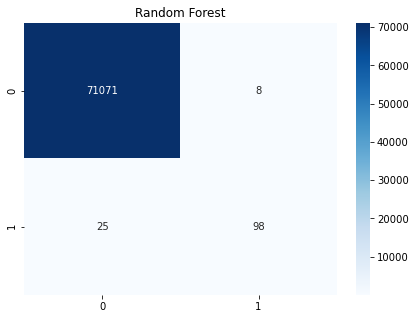

In [17]:
plt.figure(figsize = (7,5))
cm = sb.heatmap(confusion_matrix(y_test, y_test_pred_randf), annot=True, cmap='Blues', fmt='d')
cm.set_title('Random Forest')
plt.show()

## Kernel Support Vector Machine

In [21]:
from sklearn.svm import SVC
KSVM = SVC(kernel = "poly", C = 1)
KSVM.fit(x_train, y_train)
y_test_pred_KSVM = KSVM.predict(x_test)
print_classification_result(y_test, y_test_pred_KSVM)

Accuracy Score
: 99.71%
Confusion Matrix: 
 [[70894   185]
 [   18   105]]

MCC_Score
:0.5549097803116992

f1_score: 
 0.5084745762711864

recall_score: 
 0.8536585365853658

Precision_Score
:0.3620689655172414


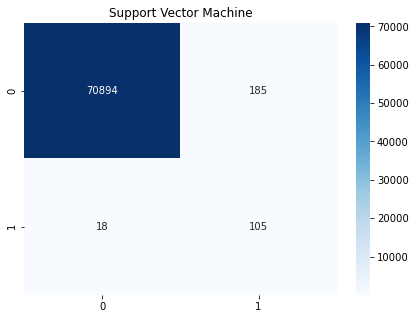

In [22]:
plt.figure(figsize = (7,5))
cm = sb.heatmap(confusion_matrix(y_test, y_test_pred_KSVM), annot=True, cmap='Blues', fmt='d')
cm.set_title('Support Vector Machine')
plt.show()

## K Nearest Neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = "minkowski")
knn.fit(x_train, y_train)
y_test_pred_KNN = knn.predict(x_test)
print_classification_result(y_test, y_test_pred_KNN)

Accuracy Score
: 99.81%
Confusion Matrix: 
 [[70962   117]
 [   16   107]]

MCC_Score
:0.6438629576100906

f1_score: 
 0.6167146974063401

recall_score: 
 0.8699186991869918

Precision_Score
:0.47767857142857145


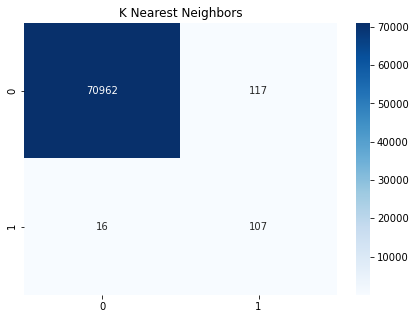

In [21]:
plt.figure(figsize = (7,5))
cm = sb.heatmap(confusion_matrix(y_test, y_test_pred_KNN), annot=True, cmap='Blues', fmt='d')
cm.set_title('K Nearest Neighbors')
plt.show()

## Naive Bayes Classifier

In [22]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_test_pred_NB = nb.predict(x_test)
print_classification_result(y_test, y_test_pred_NB)

Accuracy Score
: 97.54%
Confusion Matrix: 
 [[69348  1731]
 [   19   104]]

MCC_Score
:0.21521105781272304

f1_score: 
 0.1062308478038815

recall_score: 
 0.8455284552845529

Precision_Score
:0.05667574931880109


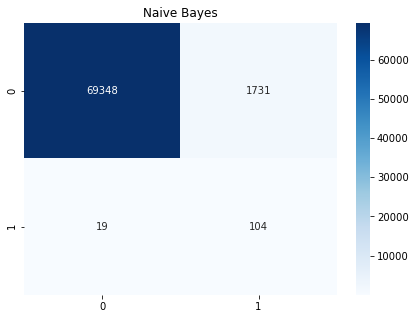

In [23]:
plt.figure(figsize = (7,5))
cm = sb.heatmap(confusion_matrix(y_test, y_test_pred_NB), annot=True, cmap='Blues', fmt='d')
cm.set_title('Naive Bayes')
plt.show()

## Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = "gini", min_samples_leaf = 10)
tree.fit(x_train, y_train)
y_test_pred_tree = tree.predict(x_test)
print_classification_result(y_test, y_test_pred_tree)

Accuracy Score
: 99.64%
Confusion Matrix: 
 [[70846   233]
 [   22   101]]

MCC_Score
:0.4970544272169406

f1_score: 
 0.4420131291028447

recall_score: 
 0.8211382113821138

Precision_Score
:0.3023952095808383


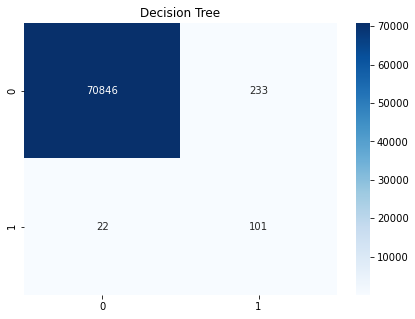

In [21]:
plt.figure(figsize = (7,5))
cm = sb.heatmap(confusion_matrix(y_test, y_test_pred_tree), annot=True, cmap='Blues', fmt='d')
cm.set_title('Decision Tree')
plt.show()

## Logistics Regression

In [22]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=1, class_weight= None)
log.fit(x_train, y_train)
y_test_pred_log = log.predict(x_test)
print_classification_result(y_test, y_test_pred_log)

Accuracy Score
: 97.71%
Confusion Matrix: 
 [[69458  1621]
 [   10   113]]

MCC_Score
:0.2413585502744722

f1_score: 
 0.12170166935918146

recall_score: 
 0.9186991869918699

Precision_Score
:0.0651672433679354


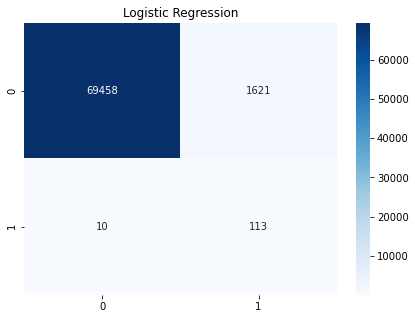

In [23]:
plt.figure(figsize = (7,5))
cm = sb.heatmap(confusion_matrix(y_test, y_test_pred_log), annot=True, cmap='Blues', fmt='d')
cm.set_title('Logistic Regression')
plt.show()

## Artificial Neural Network

In [24]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 31, activation = "relu"))
ann.add(tf.keras.layers.Dense(units = 15, activation = "relu"))
ann.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
loss = ann.fit(x_train, y_train, batch_size = 32, epochs = 20, validation_split = 0.3)

Epoch 1/20
9330/9330 [==============================] - 5s 518us/step - loss: 0.0323 - accuracy: 0.9891 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 2/20
9330/9330 [==============================] - 5s 518us/step - loss: 0.0064 - accuracy: 0.9985 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 3/20
9330/9330 [==============================] - 5s 529us/step - loss: 0.0046 - accuracy: 0.9990 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 4/20
9330/9330 [==============================] - 5s 501us/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.0016 - val_accuracy: 0.9999
Epoch 5/20
9330/9330 [==============================] - 5s 510us/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 6/20
9330/9330 [==============================] - 5s 500us/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9992
Epoch 7/20
9330/9330 [==============================] - 5s 500us/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 6.8700e-

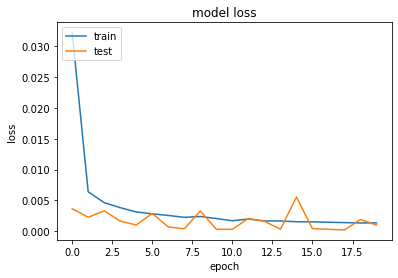

In [26]:
plt.plot(loss.history['loss'])
plt.plot(loss.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
y_pred = ann.predict(x_test)
y_pred = np.round(y_pred)
print_classification_result(y_test, y_pred)

Accuracy Score
: 99.92%
Confusion Matrix: 
 [[71042    37]
 [   22   101]]

MCC_Score
:0.7748180037564862

f1_score: 
 0.7739463601532568

recall_score: 
 0.8211382113821138

Precision_Score
:0.7318840579710145


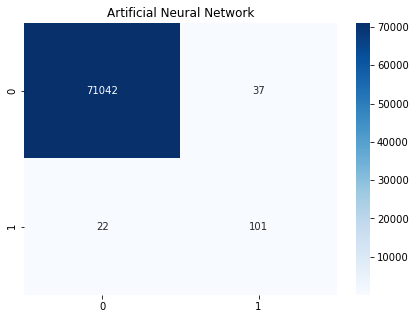

In [28]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize = (7,5))
cm = sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
cm.set_title('Artificial Neural Network')
plt.show()

## Convolutional Neural Network

In [19]:
x_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1], 1)

In [20]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv1D(filters = 128, kernel_size = 3, activation = 'relu', input_shape = [x_train.shape[1], 1]))
cnn.add(tf.keras.layers.MaxPool1D(pool_size = 2, strides = 1))
cnn.add(tf.keras.layers.Conv1D(filters = 128, kernel_size = 2, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool1D(pool_size = 2, strides = 1))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
loss = cnn.fit(x_train, y_train, batch_size = 32, epochs = 20, verbose = 1, validation_split = 0.3)

Epoch 1/20
9330/9330 [==============================] - 51s 5ms/step - loss: 0.0239 - accuracy: 0.9922 - val_loss: 0.0036 - val_accuracy: 0.9988
Epoch 2/20
9330/9330 [==============================] - 54s 6ms/step - loss: 0.0062 - accuracy: 0.9984 - val_loss: 0.0161 - val_accuracy: 0.9946
Epoch 3/20
9330/9330 [==============================] - 55s 6ms/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4/20
9330/9330 [==============================] - 53s 6ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0015 - val_accuracy: 0.9994
Epoch 5/20
9330/9330 [==============================] - 54s 6ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 1.0733e-04 - val_accuracy: 1.0000
Epoch 6/20
9330/9330 [==============================] - 53s 6ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 4.0397e-04 - val_accuracy: 0.9999
Epoch 7/20
9330/9330 [==============================] - 52s 6ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 5.2452e

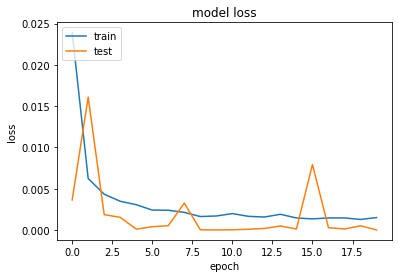

In [22]:
plt.plot(loss.history['loss'])
plt.plot(loss.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
y_pred = cnn.predict(x_test)
y_pred = np.round(y_pred)
print_classification_result(y_test, y_pred)

Accuracy Score
: 99.90%
Confusion Matrix: 
 [[71034    45]
 [   27    96]]

MCC_Score
:0.7284700382718153

f1_score: 
 0.7272727272727273

recall_score: 
 0.7804878048780488

Precision_Score
:0.6808510638297872


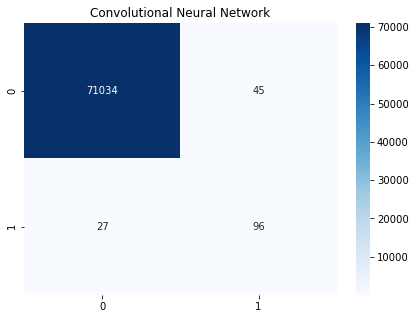

In [24]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize = (7,5))
cm = sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
cm.set_title('Convolutional Neural Network')
plt.show()